In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.optim as optim

# use gpu
cuda = True
cuda = cuda and torch.cuda.is_available()

seed = 666
if cuda:
    torch.cuda.manual_seed(seed)

# Load MNIST data 

In [2]:
if not os.path.exists('./data'):
    os.mkdir('./data')
    
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
train_set = dset.MNIST(root='./data', train=True, transform=trans, download=False)
test_set = dset.MNIST(root='./data', train=False, transform=trans, download=False)

batch_size = 64
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=True)

# Visualize data

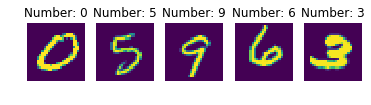

In [3]:
batch = next(iter(test_loader)) # test loader is an iterable
samples = batch[0][:5]
y_true = batch[1]
for i, sample in enumerate(samples):
    plt.subplot(1, 5, i+1)
    plt.title('Number: %i' %y_true[i])
    plt.imshow(sample.numpy().reshape(28,28))
    plt.axis('off')

# Define the NN

In [4]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256,10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        out = F.softmax(self.fc3(x))
        return out

# Training

In [5]:
model = NN()
if cuda:
    model.cuda()
model.train()

optimizer = optim.Adam(model.parameters(), lr=0.001)  # opt

losses = []
for epoch in range(10):
    # training
    for i, (batch_x, batch_y) in enumerate(train_loader):
        # get input 
        X, y = Variable(batch_x.cuda()), Variable(batch_y.cuda())
        optimizer.zero_grad()  # zero the gradient buffers
        
        # Predict by model
        out = model(X)
        
        # Calculate loss 
        loss = F.cross_entropy(out, y)
        losses.append(loss.item())
        
        # Backpropagation
        loss.backward()
        optimizer.step()  # Does the update 
        
        # Display 
        if i % 100 == 1:
            print('\r Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, 
                i * len(batch_x), 
                len(train_loader.dataset),
                100. * i / len(train_loader), 
                loss.item()))

/home/ericakcc/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


 Train Epoch: 0 [64/60000 (0%)]	Loss: 2.301097
 Train Epoch: 0 [6464/60000 (11%)]	Loss: 1.619173
 Train Epoch: 0 [12864/60000 (21%)]	Loss: 1.605539
 Train Epoch: 0 [19264/60000 (32%)]	Loss: 1.585468
 Train Epoch: 0 [25664/60000 (43%)]	Loss: 1.581948
 Train Epoch: 0 [32064/60000 (53%)]	Loss: 1.550701
 Train Epoch: 0 [38464/60000 (64%)]	Loss: 1.538856
 Train Epoch: 0 [44864/60000 (75%)]	Loss: 1.530743
 Train Epoch: 0 [51264/60000 (85%)]	Loss: 1.533216
 Train Epoch: 0 [57664/60000 (96%)]	Loss: 1.557186
 Train Epoch: 1 [64/60000 (0%)]	Loss: 1.569079
 Train Epoch: 1 [6464/60000 (11%)]	Loss: 1.558888
 Train Epoch: 1 [12864/60000 (21%)]	Loss: 1.598992
 Train Epoch: 1 [19264/60000 (32%)]	Loss: 1.526896
 Train Epoch: 1 [25664/60000 (43%)]	Loss: 1.531517
 Train Epoch: 1 [32064/60000 (53%)]	Loss: 1.547326
 Train Epoch: 1 [38464/60000 (64%)]	Loss: 1.533538
 Train Epoch: 1 [44864/60000 (75%)]	Loss: 1.590641
 Train Epoch: 1 [51264/60000 (85%)]	Loss: 1.470651
 Train Epoch: 1 [57664/60000 (96%)]	Loss:

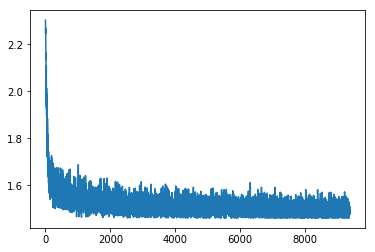

In [6]:
# plot losses in every step
plt.plot(losses)

# Evaluate

In [7]:
evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor())).cuda()
evaluate_y = Variable(test_loader.dataset.test_labels).cuda()


output = model(evaluate_x)
pred = output.data.max(1)[1]
d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum().float()/d.size()[0]

print('Accuracy:', accuracy)

Accuracy: tensor(0.9378)


/home/ericakcc/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/ericakcc/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/home/ericakcc/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]
